In [30]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [31]:
X = random.sample(range(-10, 10000), 500)

In [35]:
X = np.array(X)

u = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
X = (X - u)/std

Y = []

for i in X:
    Y.append(20 * i + 100)
Y = np.array(Y)

In [36]:
X.shape

(500,)

In [37]:
split = 0.8

train_X = X[:int(split * X.shape[0])]
train_Y = Y[:int(split * Y.shape[0])]

test_X = X[int(split * X.shape[0]):]
test_Y = Y[int(split * Y.shape[0]):]

In [38]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(400,) (100,) (400,) (100,)


In [39]:
def hypothesis(X, weight):
    y_pred = weight[0] + weight[1] * X
    return y_pred

In [40]:
def loss_func(X, weight, Y_true):
    
    loss = 0
    
    for i in range(X.shape[0]):
        y_pred = hypothesis(X[i], weight)
        loss += (y_pred - Y_true[i])**2
        
    return loss/X.shape[0]

In [41]:
def gradient(X, Y, weight):
    
    grad = np.zeros((2, ))
    
    for i in range(X.shape[0]):
        y_pred = hypothesis(X[i], weight)
        
        grad[0] += (y_pred - Y[i])
        grad[1] += (y_pred - Y[i]) * X[i]
        
    return grad/X.shape[0]

In [48]:
def gradient_descent(X_train, Y_train):
    
    weight = np.zeros((2, ))
    loss_epoch = []
    lr_rate = 0.03
    
    epochs = 5000
    
    for i in range(epochs):
        
        grad = gradient(X_train, Y_train, weight)
        
        loss = loss_func(X_train, weight, Y_train)
        loss_epoch.append(loss)
        
        weight[0] = weight[0] - lr_rate * grad[0]
        weight[1] = weight[1] - lr_rate * grad[1]
        
    return weight, loss_epoch

In [49]:
weight, loss_epoch = gradient_descent(train_X, train_Y)

In [50]:
loss_epoch

[10374.068749995793,
 9762.445314386758,
 9186.882601896772,
 8645.25443202036,
 8135.559990690688,
 7655.91643800712,
 7204.5519518659285,
 6779.7991817895545,
 6380.089088764999,
 6003.94514832868,
 5649.977895477472,
 5316.879791248761,
 5003.420392000992,
 4708.441803544931,
 4430.854403328245,
 4169.6328148669,
 3923.8121195485764,
 3692.4842918107884,
 3474.7948445218753,
 3269.939672169282,
 3077.162080191246,
 2895.749989475151,
 2725.033305693568,
 2564.3814437578394,
 2413.200998242399,
 2270.9335511722984,
 2137.0536090740848,
 2011.0666616677495,
 1892.5073550269524,
 1780.9377724577419,
 1675.9458167439898,
 1577.1436877822719,
 1484.1664499814726,
 1396.6706841340697,
 1314.3332187780532,
 1236.8499363623353,
 1163.934649804771,
 1095.3180452920456,
 1030.7466874154734,
 969.9820829670228,
 912.7997999366792,
 858.9886384561847,
 808.3498506261504,
 760.6964063441341,
 715.8523024212633,
 673.6519124349076,
 633.9393749154311,
 596.5680176066805,
 561.3998156731519,
 528.

In [51]:
loss_epoch[-1]

5.504759749053605e-26

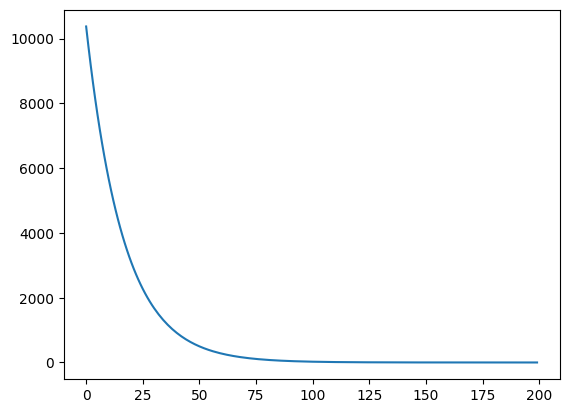

In [55]:
plt.plot(loss_epoch[:200])

In [47]:
weight

array([99.99996937, 19.99999106])

In [56]:
loss_epoch[-1]

5.504759749053605e-26

In [58]:
y_pred = []

for i in range(test_X.shape[0]):
    pred = hypothesis(test_X[i], weight)
    print(pred, test_Y[i])
    y_pred.append(pred)

100.54431191826696 100.54431191826718
124.30179809576158 124.30179809576188
89.42798672404096 89.42798672404115
85.38444896202611 85.3844489620263
95.49329336706323 95.49329336706344
76.28308534617788 76.28308534617804
83.38310198890765 83.38310198890784
88.84255869789067 88.84255869789085
74.30896758357805 74.3089675835782
66.67798133573521 66.67798133573535
123.4440779644251 123.44407796442539
108.46801217918494 108.4680121791852
67.21575824347794 67.21575824347806
124.40390763520641 124.4039076352067
118.0731161896276 118.07311618962788
123.45088526705476 123.45088526705506
95.59540290650804 95.59540290650826
86.40554435647431 86.4055443564745
71.04146232134383 71.04146232134397
122.83142072775618 122.83142072775648
104.41766711454044 104.41766711454068
109.06024750796489 109.06024750796514
80.56487870023065 80.56487870023082
80.23132087137756 80.23132087137773
131.42223664638033 131.42223664638064
127.8688246737006 127.86882467370091
132.729238751274 132.72923875127432
130.29222440

In [61]:
def R2_score(y_t, y_p):
    numerator = np.sum((y_t - y_p)**2)
    denominator = np.sum((y_t - np.array(y_p).mean())**2)
    return 1 - numerator/denominator

In [62]:
print(R2_score(test_Y, y_pred))

1.0
